<a href="https://colab.research.google.com/github/Michwynn/Capstone-Team-Air-/blob/Machine-Learning/Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import warnings # supress warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Capstone

pd.set_option('display.max_columns', None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Capstone


**read dataset**

In [ ]:
df = pd.read_csv('assets/cleaned_assets/df_cleaned.csv', index_col=0)
# drop id variable
del df['id']
del df['host_since'] # ------------> try to experiment with this
del df['amenities'] # ------------> try to experiment with this
del df['latitude'] # ------------> try to experiment with this
del df['longitude'] # ------------> try to experiment with this
# show all columns
df.columns

Index(['Borough', 'total_crimes', 'Population per square kilometre',
       'Census population', 'Property price', 'neighbourhood_cleansed',
       'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'property_type', 'room_type', 'accommodates', 'minimum_nights',
       'maximum_nights', 'number_of_reviews', 'price', 'amenities_count',
       'closest_station_dist', 'within_1k_station', 'closest_POI_dist',
       'within_5k_POI', 'dist_from_center'],
      dtype='object')

**create model_df by creating dummy vars and combining with numerical cols**

In [ ]:
# borough_dummy = pd.get_dummies(df['Borough'])
neighbourhood_cleansed_dummy = pd.get_dummies(df["neighbourhood_cleansed"])
host_has_profile_pic_dummy = pd.get_dummies(df["host_has_profile_pic"]).rename(columns={'f': 'host_has_profile_pic_f', 't': 'host_has_profile_pic_t'})
host_identity_verified_dummy = pd.get_dummies(df["host_identity_verified"]).rename(columns={'f': 'host_identity_verified_f', 't': 'host_identity_verified_t'})
property_type_dummy = pd.get_dummies(df["property_type"])
room_type_dummy = pd.get_dummies(df["room_type"])

# Combining the non dummy wtih dummy variables datasets
dummy_features = pd.concat([#borough_dummy, 
                            neighbourhood_cleansed_dummy, 
                            host_has_profile_pic_dummy, 
                            host_identity_verified_dummy, 
                            property_type_dummy, 
                            room_type_dummy], axis=1)

print("total number of dummy variables:", len(dummy_features.columns))

# remaining features left that were not converted to dummy
df = df[['total_crimes', 'Population per square kilometre', 'Census population', 
         'Property price', 'accommodates', 'minimum_nights', 'maximum_nights', 
         'number_of_reviews', 'amenities_count', 'closest_station_dist', 'within_1k_station',
         'closest_POI_dist', 'within_5k_POI', 'dist_from_center', 'price']]

model_df = pd.concat([dummy_features, df], axis=1)

total number of dummy variables: 140


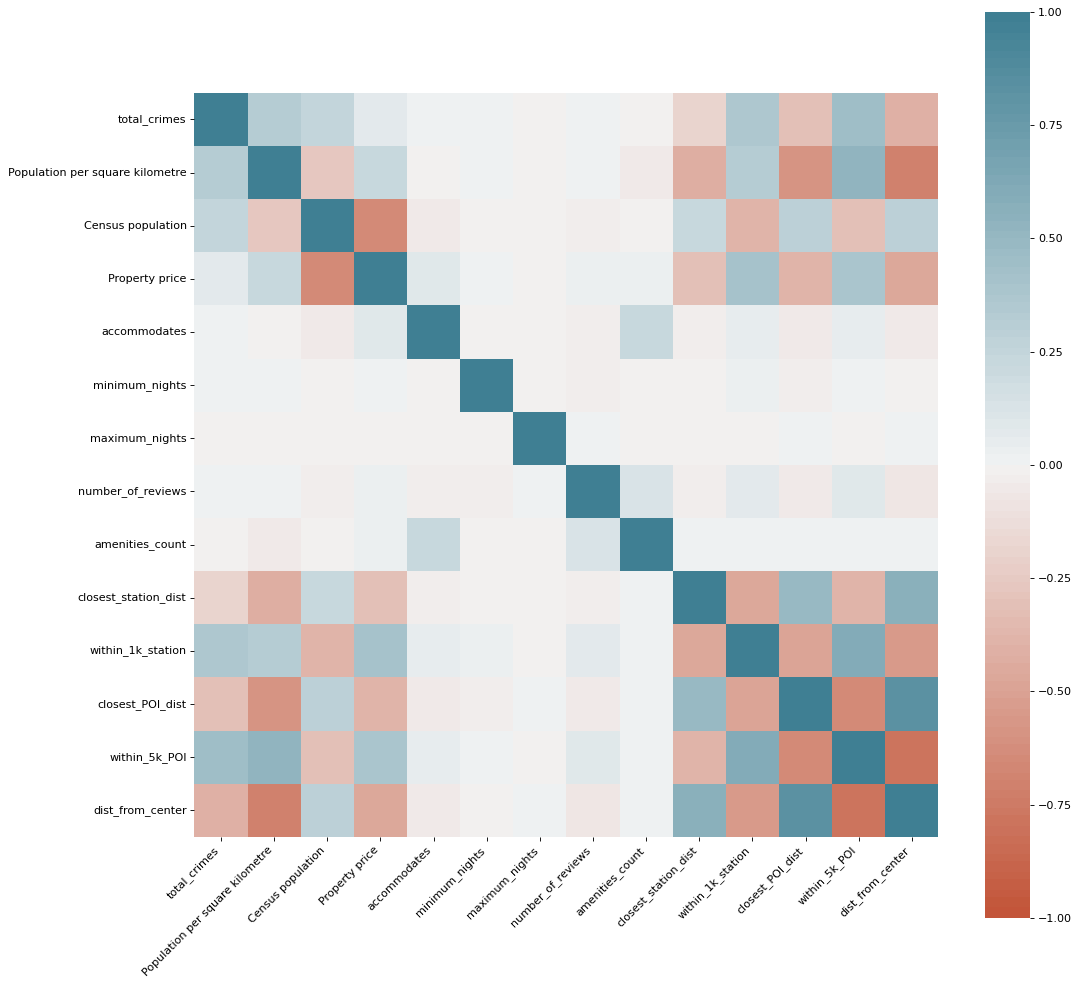

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(15, 15), dpi=80)

corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=100),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);